In [1]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### Load the dataset

In [2]:
df = pd.read_csv('insurance_fraudulent_train_data.csv')

# View first 5 rows
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


#### Basic Dataset Information

In [3]:
df.shape

(1000, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


#### EDA Visualizations

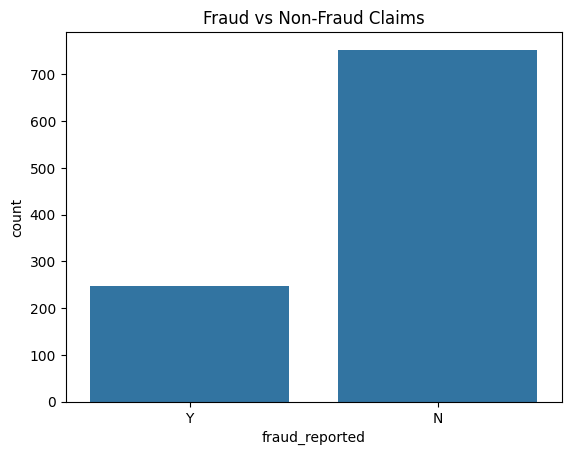

In [6]:
#Target variable analysis
sns.countplot(x='fraud_reported', data=df)
plt.title('Fraud vs Non-Fraud Claims')
plt.show()

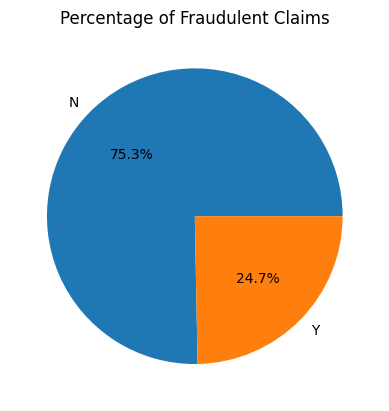

In [7]:
#Fraud Percentage using Pie Chart
fraud_counts = df['fraud_reported'].value_counts()
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Fraudulent Claims')
plt.show()

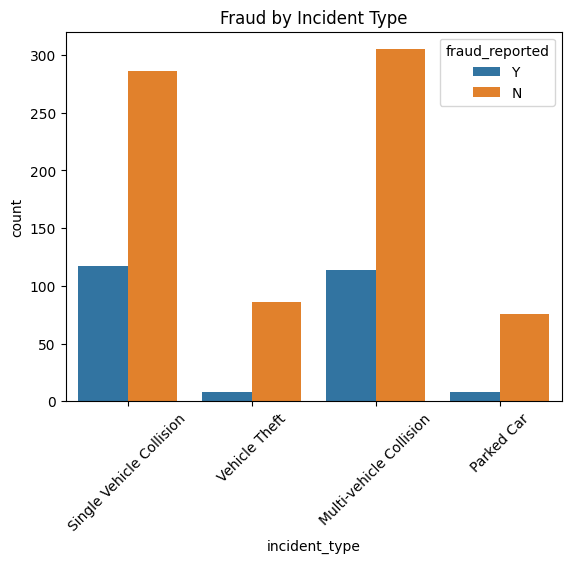

In [8]:
#Fraud by Incident Type
sns.countplot(x='incident_type', hue='fraud_reported', data=df)
plt.xticks(rotation=45)
plt.title('Fraud by Incident Type')
plt.show()

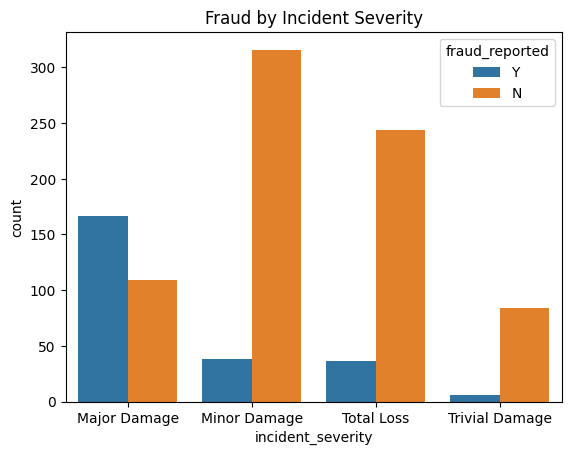

In [9]:
#Fraud by Incident Severity
sns.countplot(x='incident_severity', hue='fraud_reported', data=df)
plt.title('Fraud by Incident Severity')
plt.show()

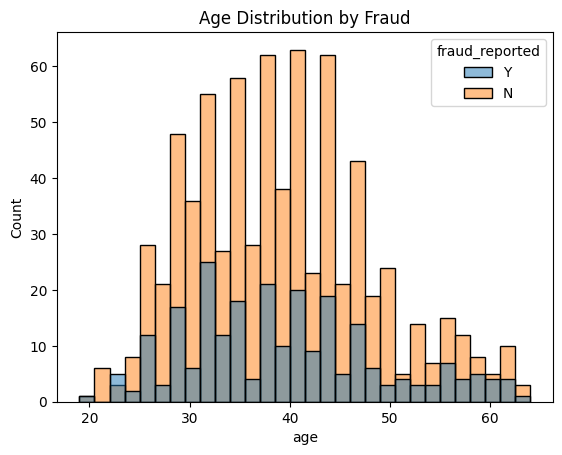

In [10]:
#Fraud by Age using Histo
sns.histplot(data=df, x='age', hue='fraud_reported', bins=30)
plt.title('Age Distribution by Fraud')
plt.show()

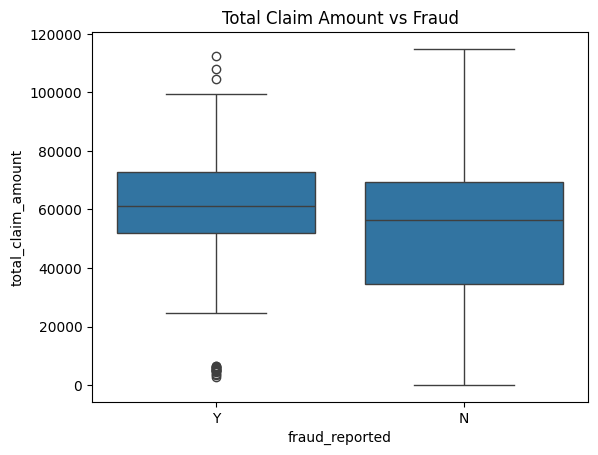

In [11]:
#Claim Amount vs Fraud using Box plot
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=df)
plt.title('Total Claim Amount vs Fraud')
plt.show()

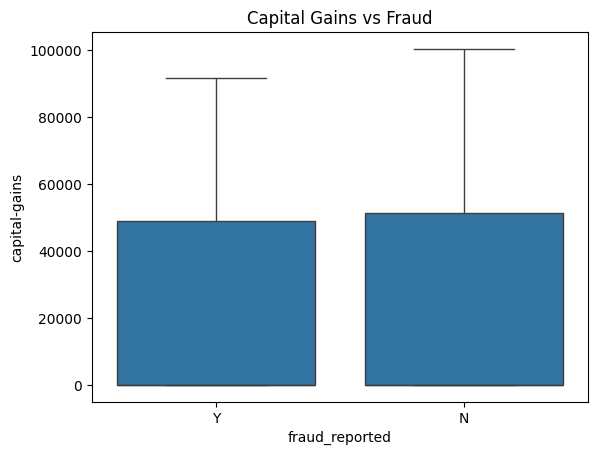

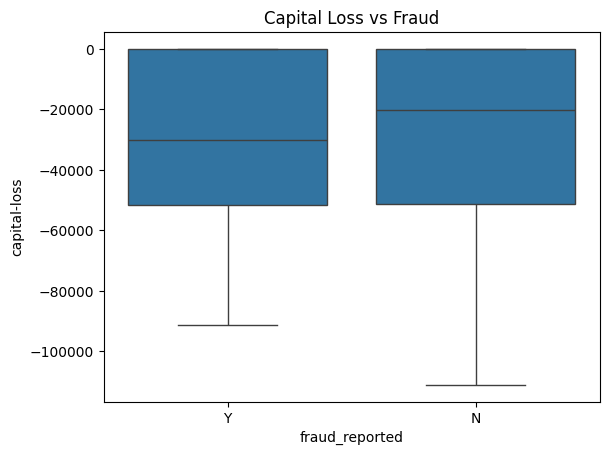

In [12]:
#Capital Gain & Loss vs Fraud
sns.boxplot(x='fraud_reported', y='capital-gains', data=df)
plt.title('Capital Gains vs Fraud')
plt.show()

sns.boxplot(x='fraud_reported', y='capital-loss', data=df)
plt.title('Capital Loss vs Fraud')
plt.show()

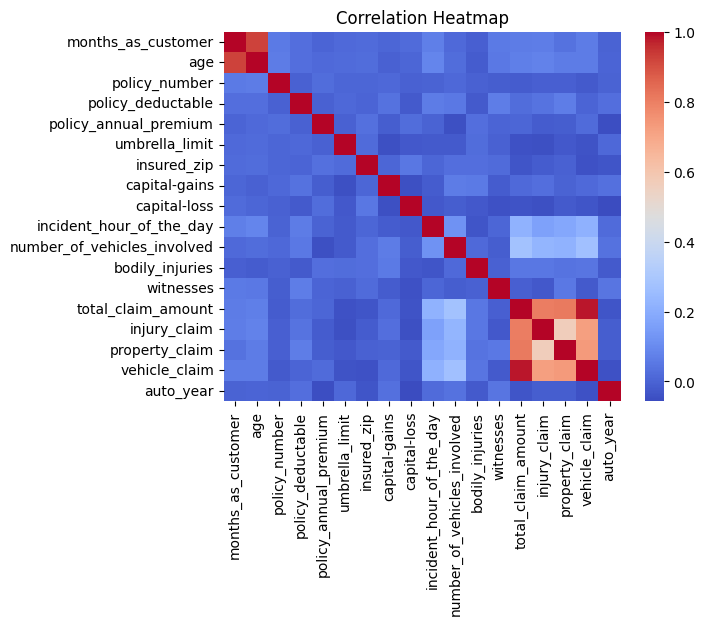

In [13]:
#Correlation Heatmap
numeric_df = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Drop Irrelevant Columns

In [14]:
columns_to_drop = [
    'policy_number',
    'policy_bind_date',
    'incident_date',
    'incident_location',
    'incident_city',
    'incident_state',
    'auto_make',
    'auto_model'
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

#### Handle Missing Values

In [15]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_amount              0
injury_claim                    0
property_claim                  0
vehicle_claim                   0
auto_year     

In [16]:
# Fill numerical columns with median
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

#### Encode Categorical Features using Label Encoder

In [17]:
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#### Feature & Target Split

In [18]:
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

#### Train–Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#### Model Training with RandomForest, LogistictRegression, DecisionTree, KNN and GradientBoosting, also finding the best model using GridSearchCV

In [20]:
rf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [21]:
lr = LogisticRegression(max_iter=1000)

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

In [22]:
dt = DecisionTreeClassifier(random_state=42)

dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [23]:
knn = KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [24]:
gb = GradientBoostingClassifier(random_state=42)

gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

In [25]:
models_and_grids = {
    'Random Forest': (rf, rf_param_grid),
    'Logistic Regression': (lr, lr_param_grid),
    'Decision Tree': (dt, dt_param_grid),
    'KNN': (knn, knn_param_grid),
    'Gradient Boosting': (gb, gb_param_grid),
}

In [26]:
from sklearn.model_selection import GridSearchCV

best_models = {}
results = []

for model_name, (model, param_grid) in models_and_grids.items():
    print(f"\nRunning GridSearchCV for {model_name}...")
    
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    grid.fit(X_train, y_train)
    
    best_models[model_name] = grid.best_estimator_
    
    results.append({
        'Model': model_name,
        'Best CV Score': grid.best_score_,
        'Best Parameters': grid.best_params_
    })


Running GridSearchCV for Random Forest...

Running GridSearchCV for Logistic Regression...


C:\Users\jishn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\jishn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r


Running GridSearchCV for Decision Tree...

Running GridSearchCV for KNN...

Running GridSearchCV for Gradient Boosting...


In [27]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Best CV Score',ascending=False).reset_index(drop=True)
results_df

,Model,Best CV Score,Best Parameters
0,Gradient Boosting,0.832000,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
1,Decision Tree,0.830667,"{'criterion': 'gini', 'max_depth': 5, 'min_sam..."
2,Random Forest,0.778667,"{'max_depth': None, 'min_samples_leaf': 2, 'mi..."
3,Logistic Regression,0.748000,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}"
4,KNN,0.730667,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei..."


In [28]:
best_model_name = results_df.iloc[0]['Model']
best_model = best_models[best_model_name]

y_pred = best_model.predict(X_test)

print('Best Model:', best_model_name)
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))

Best Model: Gradient Boosting
Test Accuracy: 0.812

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       188
           1       0.61      0.66      0.64        62

    accuracy                           0.81       250
   macro avg       0.75      0.76      0.75       250
weighted avg       0.82      0.81      0.81       250



#### confusion matrix- Best Model

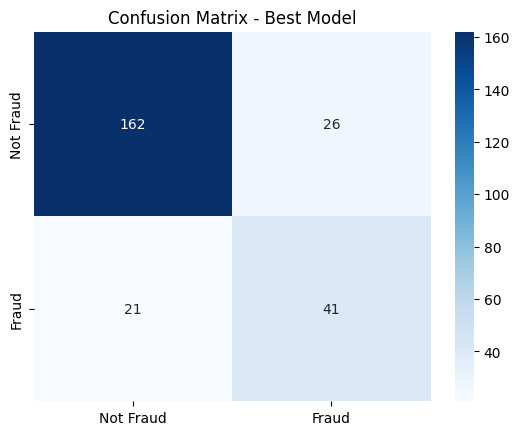

In [32]:
# Predict using best model
y_pred = best_model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix using heatmap
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Fraud', 'Fraud'],
    yticklabels=['Not Fraud', 'Fraud']
)
plt.title("Confusion Matrix - Best Model")
plt.show()

In [29]:
# Create a sample 'new' claim (using 0th row of test data as an example)
new_claim_data = X.iloc[[0]]

# Make Prediction
prediction = best_model.predict(new_claim_data)
probability = best_model.predict_proba(new_claim_data)[:, 1]

print(f"Prediction: {'FRAUDULENT' if prediction[0] == 1 else 'LEGITIMATE'}")
print(f"Fraud Probability: {probability[0]:.2%}")

Prediction: FRAUDULENT
Fraud Probability: 66.98%


#### Saving best model for streamlit deployment

In [25]:
import joblib

# Save trained model
joblib.dump(best_model, 'insurance_fraud_model.pkl')

# Save label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')

# Save training feature columns
joblib.dump(X.columns.tolist(), 'train_feature_columns.pkl')

print('Model & preprocessing files saved successfully!')

Model & preprocessing files saved successfully!
